# Correlation analysis between signal data and wear

In this notebook, a correlation analysis is conducted between the c4 dataset and its wear data.

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
import os
%matplotlib inline


In [206]:
# Silences pandas warning that ruin the display of the notebook on github
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

## Calculate basic statistics for the c4 data set

First, statistical calculations are made on each file of the dataset. The results of those are saved to a separate file, which then is used for the correlation analysis.
The calculated statisitcs:
- minimum
- maximum
- mean
- standard deviation
- skewness
- kurtosis
- energy
- zero crossings

In [207]:
def calculate_zero_crossings(signal):
    return ((np.diff(np.sign(signal)) != 0).sum())

In [208]:
def calculate_energy(signal):
    return np.sum(signal ** 2)

In [209]:
def calculate_statistics(file_path):
    df = pd.read_csv(file_path, sep=',')
    df.columns = ['Force_X', 'Force_Y', 'Force_Z', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'AE_RMS']

    # Print summary statistics for AE_RMS
    print(f"Processing file: {file_path}")
    print("AE_RMS summary:")
    print(df['AE_RMS'].describe())  # Summary statistics for AE_RMS

    # Handle negative values
    negative_count = (df['AE_RMS'] < 0).sum()
    if negative_count > 0:
        print(f"Warning: Found {negative_count} negative values in AE_RMS.")
        # You can choose to replace negative values or take the absolute value
        df['AE_RMS'] = np.abs(df['AE_RMS'])  # Taking absolute value
        # Or uncomment the line below to replace negative values with zero
        # df['AE_RMS'] = df['AE_RMS'].clip(lower=0)

    # Check for NaN values
    if df.isnull().values.any():
        print(f"Warning: NaN values found in {file_path}")
        print(f"NaN counts:\n{df.isnull().sum()}")

    # Compute statistics as before
    stats = pd.DataFrame()
    for column in df.columns:
        col_data = df[column]
        stats[column + "_min"] = [col_data.min()]
        stats[column + "_max"] = [col_data.max()]
        stats[column + "_mean"] = [col_data.mean()]
        stats[column + "_std"] = [col_data.std()]
        stats[column + "_skew"] = [skew(col_data)]
        stats[column + "_kurtosis"] = [kurtosis(col_data)]
        stats[column + "_energy"] = [calculate_energy(col_data)]
        stats[column + "_zero_crossings"] = [calculate_zero_crossings(col_data)]
    
    return stats 

In [210]:
folder_path = '../notebooks/data/raw/c4/c4/'

stats_list = []

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path) and filename.endswith('.csv'):
        stats_list.append(calculate_statistics(file_path))

c4_stats = pd.concat(stats_list, ignore_index=True)

Processing file: ../notebooks/data/raw/c4/c4/c_4_001.csv
AE_RMS summary:
count    165596.000000
mean          0.031739
std           0.011924
min          -0.005000
25%           0.026000
50%           0.030000
75%           0.035000
max           0.098000
Name: AE_RMS, dtype: float64
Processing file: ../notebooks/data/raw/c4/c4/c_4_002.csv
AE_RMS summary:
count    165596.000000
mean          0.031739
std           0.011924
min          -0.005000
25%           0.026000
50%           0.030000
75%           0.035000
max           0.098000
Name: AE_RMS, dtype: float64
Processing file: ../notebooks/data/raw/c4/c4/c_4_003.csv
AE_RMS summary:
count    216749.000000
mean          0.056294
std           0.017970
min          -0.005000
25%           0.048000
50%           0.055000
75%           0.063000
max           0.164000
Name: AE_RMS, dtype: float64
Processing file: ../notebooks/data/raw/c4/c4/c_4_004.csv
AE_RMS summary:
count    223333.000000
mean          0.074631
std           0.024344


In [211]:
c4_stats.head()

,Force_X_min,Force_X_max,Force_X_mean,Force_X_std,Force_X_skew,Force_X_kurtosis,Force_X_energy,Force_X_zero_crossings,Force_Y_min,Force_Y_max,...,Vibration_Z_energy,Vibration_Z_zero_crossings,AE_RMS_min,AE_RMS_max,AE_RMS_mean,AE_RMS_std,AE_RMS_skew,AE_RMS_kurtosis,AE_RMS_energy,AE_RMS_zero_crossings
0,-3.966,6.974,1.840447,1.697723,-0.104311,-0.727016,1.038203e+06,3445,-7.116,11.453,...,1031.914465,68054,0.0,0.098,0.031859,0.011600,2.004860,6.871934,190.359729,20
1,-3.966,6.974,1.840447,1.697723,-0.104311,-0.727016,1.038203e+06,3445,-7.116,11.453,...,1031.914465,68054,0.0,0.098,0.031859,0.011600,2.004860,6.871934,190.359729,20
2,-5.534,9.765,2.453208,2.611066,-0.003935,-0.637509,2.782161e+06,5559,-11.538,19.054,...,1620.673919,84252,0.0,0.164,0.056384,0.017686,1.303390,5.615551,756.874365,16
3,-5.957,11.524,2.898154,3.135458,0.068945,-0.573171,4.071439e+06,5159,-13.933,23.878,...,1745.608944,89464,0.0,0.189,0.074820,0.023757,0.621307,3.631556,1376.264421,24
4,-5.408,11.112,2.490291,2.857644,0.163850,-0.721620,3.341642e+06,5701,-23.316,20.085,...,1844.179424,86917,0.0,0.232,0.075067,0.023290,1.226597,7.296581,1436.770071,42


#### Test for missing data:

In [212]:
c4_stats.isnull().sum().sum

<bound method Series.sum of Force_X_min                   0
Force_X_max                   0
Force_X_mean                  0
Force_X_std                   0
Force_X_skew                  0
Force_X_kurtosis              0
Force_X_energy                0
Force_X_zero_crossings        0
Force_Y_min                   0
Force_Y_max                   0
Force_Y_mean                  0
Force_Y_std                   0
Force_Y_skew                  0
Force_Y_kurtosis              0
Force_Y_energy                0
Force_Y_zero_crossings        0
Force_Z_min                   0
Force_Z_max                   0
Force_Z_mean                  0
Force_Z_std                   0
Force_Z_skew                  0
Force_Z_kurtosis              0
Force_Z_energy                0
Force_Z_zero_crossings        0
Vibration_X_min               0
Vibration_X_max               0
Vibration_X_mean              0
Vibration_X_std               0
Vibration_X_skew              0
Vibration_X_kurtosis          0
Vibration_X_

#### Create a correlation matrix between each stats

In [213]:
c4_corr_matrix = c4_stats.corr()

In [214]:
c4_corr_matrix.head()

,Force_X_min,Force_X_max,Force_X_mean,Force_X_std,Force_X_skew,Force_X_kurtosis,Force_X_energy,Force_X_zero_crossings,Force_Y_min,Force_Y_max,...,Vibration_Z_energy,Vibration_Z_zero_crossings,AE_RMS_min,AE_RMS_max,AE_RMS_mean,AE_RMS_std,AE_RMS_skew,AE_RMS_kurtosis,AE_RMS_energy,AE_RMS_zero_crossings
Force_X_min,1.000000,-0.996470,-0.971811,-0.998173,0.282000,0.686163,-0.979475,-0.726176,0.929506,-0.882875,...,-0.963292,-0.582063,NaN,-0.240211,-0.373968,-0.066442,0.577085,-0.462022,-0.333323,-0.077854
Force_X_max,-0.996470,1.000000,0.985042,0.998409,-0.284033,-0.710836,0.969312,0.745894,-0.942614,0.909403,...,0.955098,0.548076,NaN,0.219577,0.344694,0.049600,-0.557816,0.428980,0.300164,0.076121
Force_X_mean,-0.971811,0.985042,1.000000,0.979735,-0.350716,-0.778136,0.930019,0.775132,-0.951406,0.952435,...,0.923910,0.454024,NaN,0.155425,0.273985,0.001696,-0.505418,0.341656,0.229759,0.087322
Force_X_std,-0.998173,0.998409,0.979735,1.000000,-0.286006,-0.698222,0.977676,0.728958,-0.933908,0.893084,...,0.960165,0.573840,NaN,0.225195,0.355056,0.053949,-0.562829,0.439216,0.313345,0.080595
Force_X_skew,0.282000,-0.284033,-0.350716,-0.286006,1.000000,0.546388,-0.285437,-0.090686,0.282595,-0.362625,...,-0.273380,0.014227,NaN,0.086497,0.011023,0.072286,0.001309,-0.170635,-0.040493,-0.035689


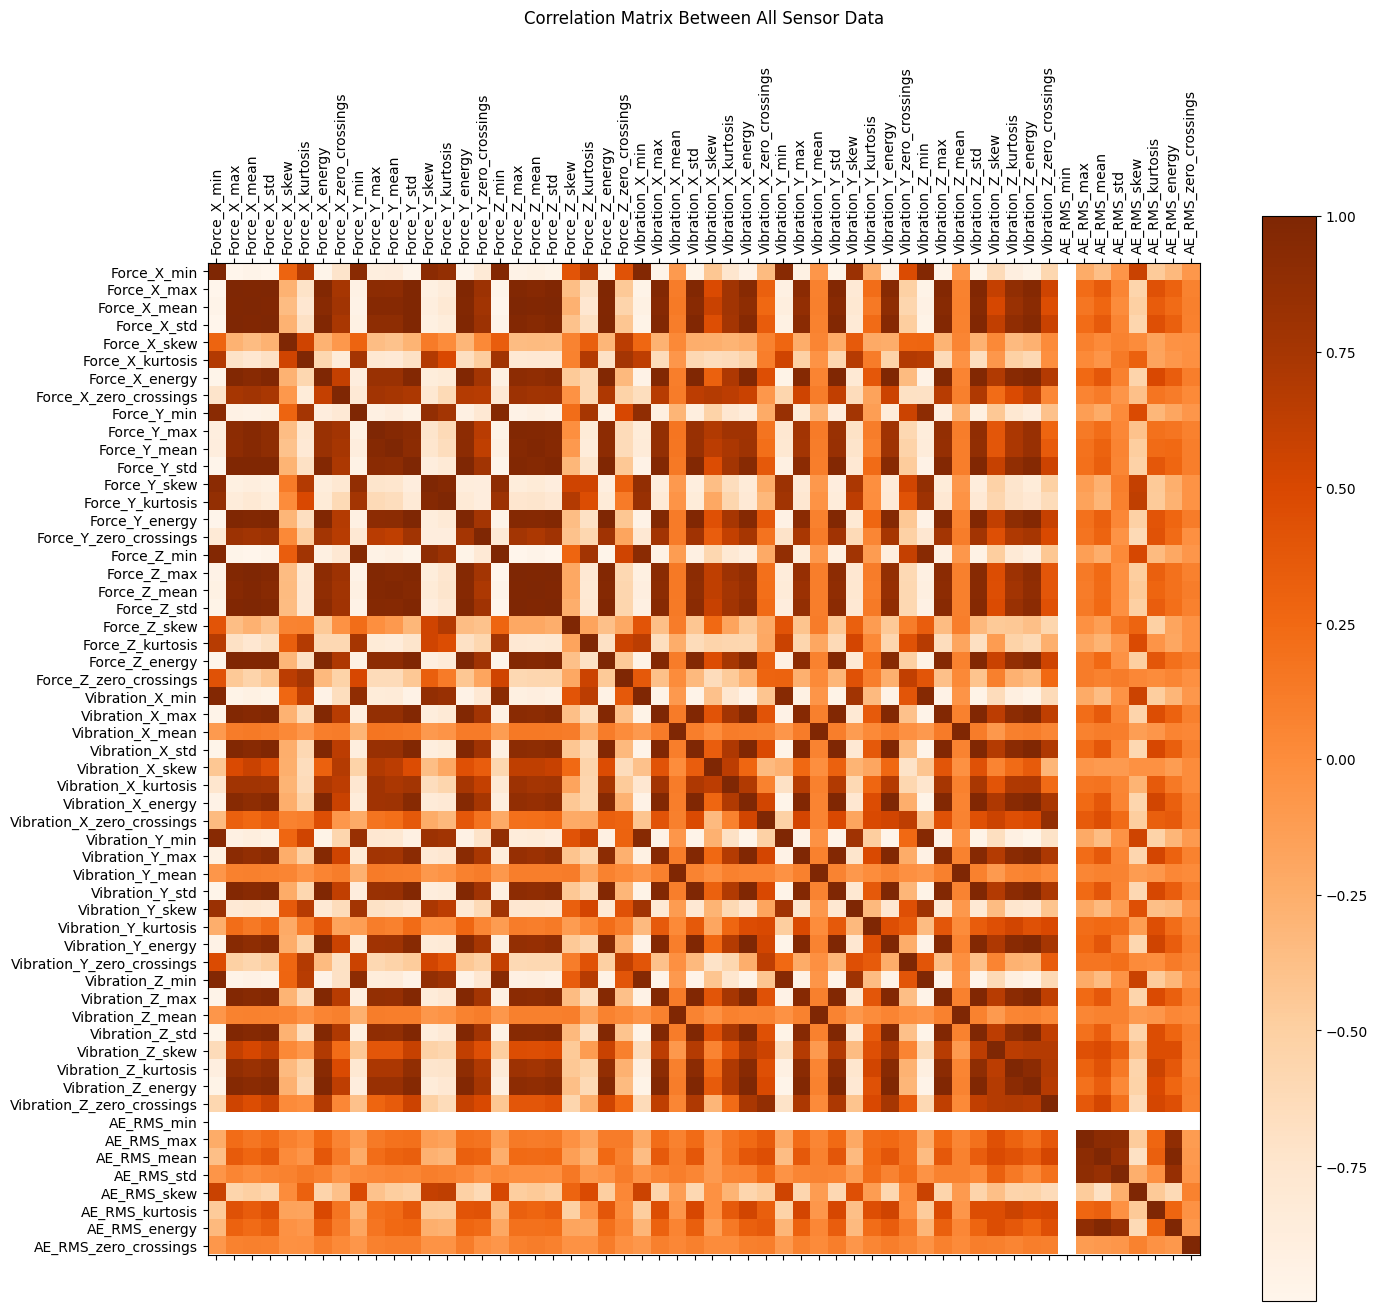

In [215]:
plt.figure(figsize=(16,14))
plt.matshow(c4_corr_matrix, fignum=1, cmap='Oranges')
plt.colorbar()
plt.xticks(range(len(c4_corr_matrix.columns)), c4_corr_matrix.columns, rotation=90)
plt.yticks(range(len(c4_corr_matrix.columns)), c4_corr_matrix.columns)
plt.title('Correlation Matrix Between All Sensor Data', pad=30)
plt.show()


## Load wear data

In [216]:
c4_wear_data = pd.read_csv('../notebooks/data/raw/c4/c4_wear.csv', sep=',')

In [217]:
c4_wear_data.head()

,cut,flute_1,flute_2,flute_3
0,1,31.416355,19.483692,21.748063
1,2,34.892770,23.473047,24.925960
2,3,38.102847,27.172868,27.898659
3,4,41.061023,30.599309,30.677848
4,5,43.781191,33.767870,33.274721


In [218]:
c4_wear_data.isnull().sum().sum

<bound method Series.sum of cut        0
flute_1    0
flute_2    0
flute_3    0
dtype: int64>

In [219]:
c4_wear_data = c4_wear_data.drop(columns=['cut'])

## Correlations between calculated statistics and wear data

In [220]:
c4_combined_data = pd.concat([c4_stats, c4_wear_data], axis=1)
c4_combined_corr_matrix = c4_combined_data.corr()

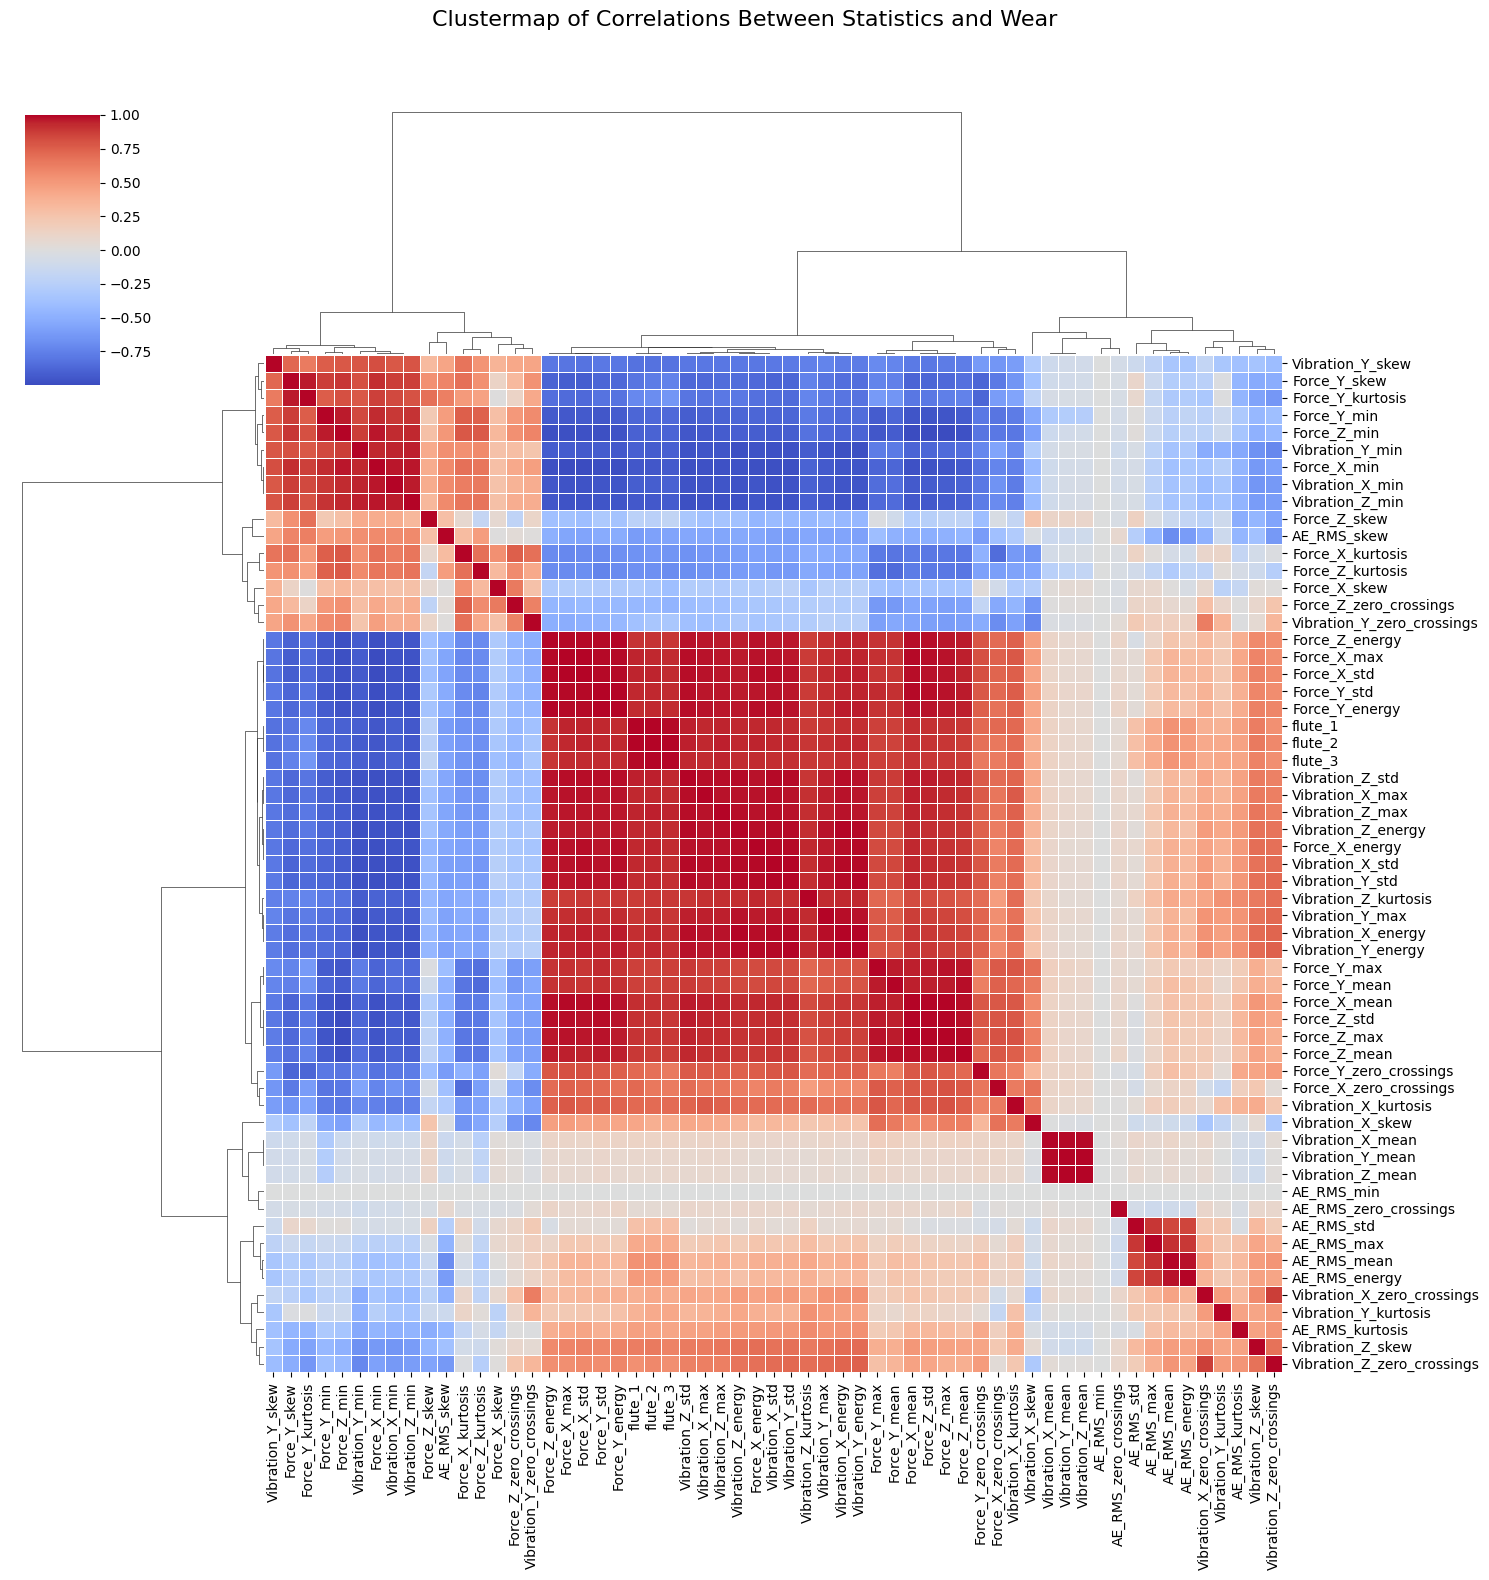

In [221]:
c4_combined_corr_matrix.fillna(1e-10, inplace=True)
clustermap = sns.clustermap(c4_combined_corr_matrix, metric='euclidean', method='ward', cmap='coolwarm', linewidths=0.5, figsize=(15, 15))
clustermap.figure.suptitle('Clustermap of Correlations Between Statistics and Wear', y=1.05, fontsize=16)
plt.show()


The above cluster matrix shoes, that wear correlates with Vibratin and Force measures the most. Signal energy especially seems to have high effect on wear. The table below, visualizes the correlation in a more straightforward manner. While in the c1 dataset, the correlations regarding the 3rd flute were weaker, in case of the c4 data, there seem to be no significant difference. Also, While before, Force showed slightly tighter correlation, now Vibration demostrates tighter relationship with the data. 

In [222]:
c4_combined_data = pd.concat([c4_stats, c4_wear_data], axis=1)
c4_combined_corr_matrix = c4_combined_data.corr()
c4_wear_corr_matrix = c4_combined_corr_matrix[['flute_1', 'flute_2', 'flute_3']].drop(['flute_1', 'flute_2', 'flute_3'], axis=0)

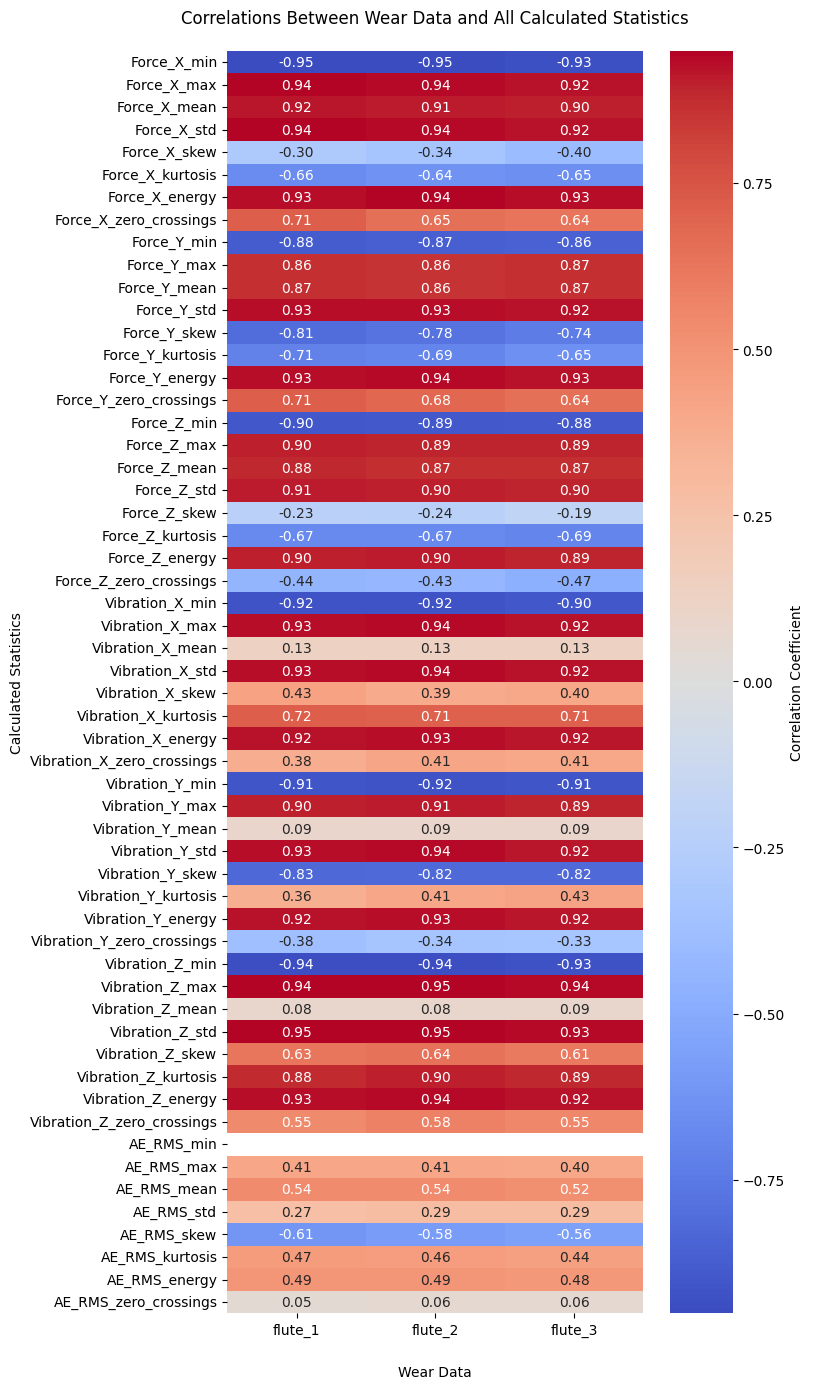

In [223]:

plt.figure(figsize=(8, 14))
sns.heatmap(c4_wear_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlations Between Wear Data and All Calculated Statistics', pad=20)
plt.ylabel('Calculated Statistics')
plt.xlabel('Wear Data', labelpad=20)
plt.tight_layout()
plt.show()


The strong correlations among similar measures across different flutes indicate that the cutting conditions and the characteristics of the machine setup are likely consistent. The presence of negative correlations in zero crossings could imply that operational strategies might be adjusted to minimize these while maintaining performance. There are strong positive correlations among all Force_X metrics across the three flutes. Similar strong correlations are evident for the Force_Y and Force_Z metrics. For instance, Force_Y_mean and Force_Z_mean show high positive correlations. Vibration_X, Vibration_Y, and Vibration_Z also display strong positive correlations among their respective measures, especially in Vibration_X_max and Vibration_Y_max. Most skewness values for the Force and Vibration metrics are close to 0, indicating a near-normal distribution. Negative skewness values in some measures suggest left-tailed distributions, while kurtosis values indicate relatively light tails (less extreme outliers). The energy metrics across the force and vibration signals are consistently high, indicating significant energy in the signals captured. The NaN value in AE_RMS_min warrants further investigation, as it may affect predictive models or analysis involving this variable.

In [224]:
min_columns = [
    'Force_X_min', 
    'Force_Y_min', 
    'Force_Z_min', 
    'Vibration_X_min', 
    'Vibration_Y_min', 
    'Vibration_Z_min', 
    'AE_RMS_min'
]
min_stats = c4_stats[min_columns]
combined_data_min = pd.concat([min_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_min = combined_data_min.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
min_correlation_matrix = corr_matrix_min.loc[min_columns, wear_columns]


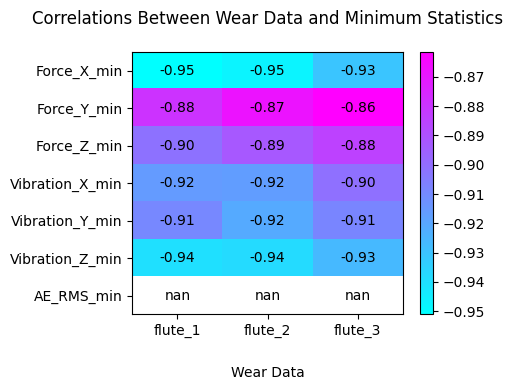

In [225]:

plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Minimum Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(min_correlation_matrix, cmap='cool', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(min_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(min_columns)), min_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()


In [226]:
max_columns = [
    'Force_X_max', 
    'Force_Y_max', 
    'Force_Z_max', 
    'Vibration_X_max', 
    'Vibration_Y_max', 
    'Vibration_Z_max', 
    'AE_RMS_max'
]
max_stats = c4_stats[max_columns]
combined_data_max = pd.concat([max_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_max = combined_data_max.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
max_correlation_matrix = corr_matrix_max.loc[max_columns, wear_columns]


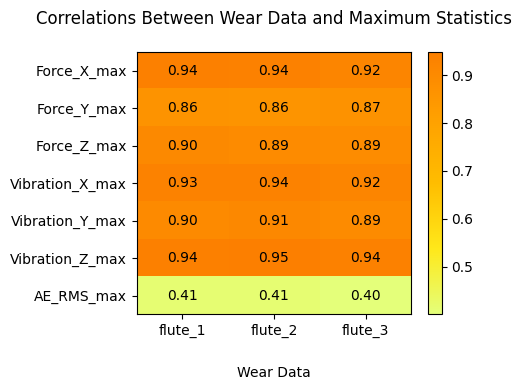

In [227]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Maximum Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(max_correlation_matrix, cmap='Wistia', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(max_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(max_columns)), max_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The strong positive correlations among the maximum values for force and vibration metrics across the three flutes suggest that the cutting conditions and equipment performance are consistent. While the AE_RMS_max values do show some correlation with the maximum forces and vibrations, the lower coefficients suggest that other factors may also be influencing AE_RMS values.

In [228]:
mean_columns = [
    'Force_X_mean', 
    'Force_Y_mean', 
    'Force_Z_mean', 
    'Vibration_X_mean', 
    'Vibration_Y_mean', 
    'Vibration_Z_mean', 
    'AE_RMS_mean'
]
mean_stats = c4_stats[mean_columns]
combined_data_mean = pd.concat([mean_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_mean = combined_data_mean.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
mean_correlation_matrix = corr_matrix_mean.loc[mean_columns, wear_columns]


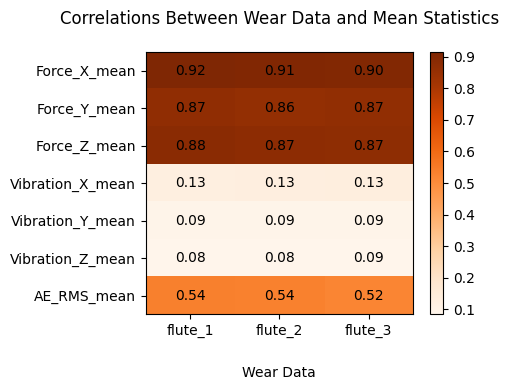

In [229]:
plt.figure(figsize=(5, 4))
plt.title('Correlations Between Wear Data and Mean Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(mean_correlation_matrix, cmap='Oranges', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(mean_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(mean_columns)), mean_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The strong correlations among the mean values of the force metrics indicate that the cutting performance across the three flutes is consistent on average. The low correlation coefficients for the vibration metrics suggest that, on average, vibrations are relatively minor compared to forces in this context. This could imply that the cutting process is stable and that excessive vibrations do not significantly affect performance. The moderate correlations of AE_RMS_mean with the force metrics indicate that while acoustic emissions provide useful information about the cutting process, they should not be solely relied upon for performance evaluations. Additional factors may influence AE_RMS readings.

In [230]:
std_columns = [
    'Force_X_std', 
    'Force_Y_std', 
    'Force_Z_std', 
    'Vibration_X_std', 
    'Vibration_Y_std', 
    'Vibration_Z_std', 
    'AE_RMS_std'
]
std_stats = c4_stats[std_columns]
combined_data_std = pd.concat([std_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_std = combined_data_std.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
std_correlation_matrix = corr_matrix_std.loc[std_columns, wear_columns]


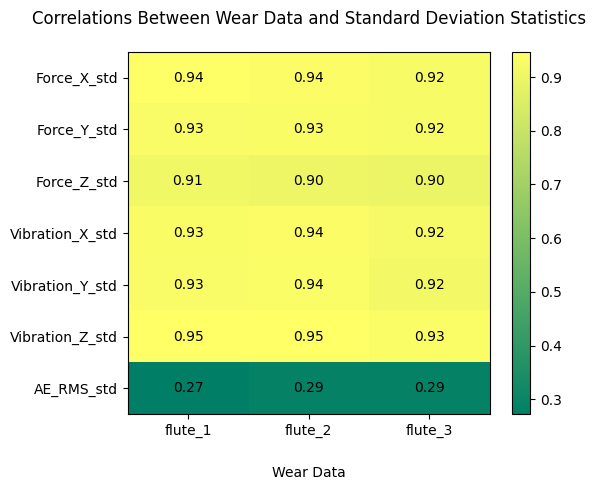

In [231]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Standard Deviation Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(std_correlation_matrix, cmap='summer', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(std_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(std_columns)), std_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

Standard deviations of force and vibration metrics reinforce the assumption that the cutting process is stable across the flutes. The standard deviation of accousitc emissions correlate to the means as well and also point towards the infulance of wider range of factors.

In [232]:
skew_columns = [
    'Force_X_skew', 
    'Force_Y_skew', 
    'Force_Z_skew', 
    'Vibration_X_skew', 
    'Vibration_Y_skew', 
    'Vibration_Z_skew', 
    'AE_RMS_skew'
]
skew_stats = c4_stats[skew_columns]
combined_data_skew = pd.concat([skew_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_skew = combined_data_skew.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
skew_correlation_matrix = corr_matrix_skew.loc[skew_columns, wear_columns]


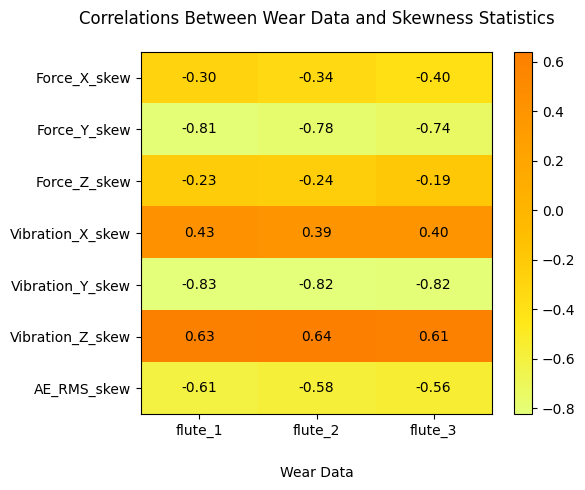

In [233]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Skewness Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(skew_correlation_matrix, cmap='Wistia', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(skew_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(skew_columns)), skew_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The negative skewness in force metrics suggests that the cutting process is generally stable, with the majority of force values being on the higher side. This can indicate a controlled cutting operation, but the presence of lower outliers may warrant monitoring to ensure they don’t indicate potential issues. The negative skewness in AE_RMS also suggests consistency, with most readings being higher, which could imply effective tool operation. However, monitoring should focus on the lower outliers to prevent unexpected issues.

In [234]:
kurtosis_columns = [
    'Force_X_kurtosis', 
    'Force_Y_kurtosis', 
    'Force_Z_kurtosis', 
    'Vibration_X_kurtosis', 
    'Vibration_Y_kurtosis', 
    'Vibration_Z_kurtosis', 
    'AE_RMS_kurtosis'
]
kurtosis_stats = c4_stats[kurtosis_columns]
combined_data_kurtosis = pd.concat([kurtosis_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_kurtosis = combined_data_kurtosis.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
kurtosis_correlation_matrix = corr_matrix_kurtosis.loc[kurtosis_columns, wear_columns]


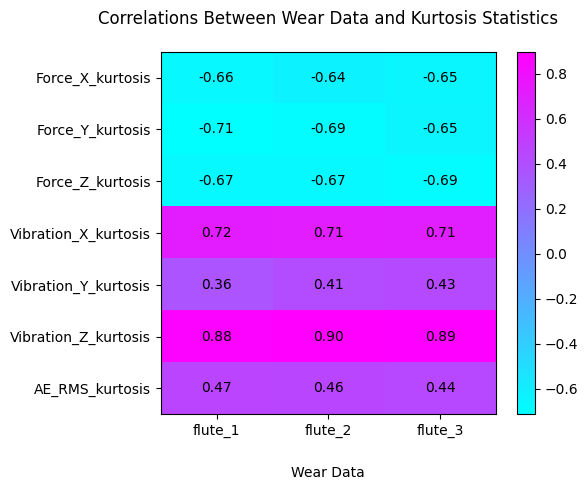

In [235]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Kurtosis Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(kurtosis_correlation_matrix, cmap='cool', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(kurtosis_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(kurtosis_columns)), kurtosis_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The negative kurtosis values in force metrics suggest that the cutting forces are stable with fewer extreme values, indicating effective control of the cutting process. The positive Kurtosis values of the vibration metrics could signify tool wear. 

In [236]:
zero_cross_columns = [
    'Force_X_zero_crossings', 
    'Force_Y_zero_crossings', 
    'Force_Z_zero_crossings', 
    'Vibration_X_zero_crossings', 
    'Vibration_Y_zero_crossings', 
    'Vibration_Z_zero_crossings', 
    'AE_RMS_zero_crossings'
]

zero_cross_stats = c4_stats[zero_cross_columns]
combined_data_zero_cross = pd.concat([zero_cross_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_zero_cross = combined_data_zero_cross.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
zero_cross_correlation_matrix = corr_matrix_zero_cross.loc[zero_cross_columns, wear_columns]



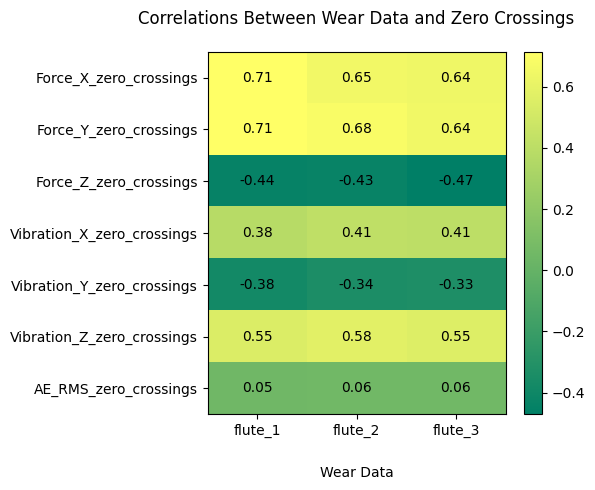

In [237]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Zero Crossings',  pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(zero_cross_correlation_matrix, cmap='summer', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(zero_cross_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(zero_cross_columns)), zero_cross_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The positive zero crossings in Force_X and Force_Y suggest that the cutting action is dynamic and responsive. This could indicate effective material engagement. The negative zero crossings in Force_Z indicate more stability, which could be beneficial for controlling the cutting depth and minimizing tool wear. 

In [238]:
energy_columns = [
    'Force_X_energy', 
    'Force_Y_energy', 
    'Force_Z_energy', 
    'Vibration_X_energy', 
    'Vibration_Y_energy', 
    'Vibration_Z_energy', 
    'AE_RMS_energy'
]

energy_stats = c4_stats[energy_columns]

combined_data_energy = pd.concat([energy_stats.reset_index(drop=True), c4_wear_data.reset_index(drop=True)], axis=1)
corr_matrix_energy= combined_data_energy.corr()
wear_columns = ['flute_1', 'flute_2', 'flute_3']
energy_correlation_matrix = corr_matrix_energy.loc[energy_columns, wear_columns]

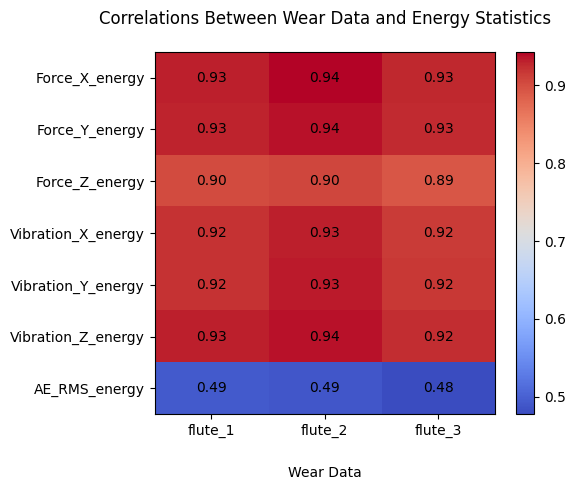

In [239]:
plt.figure(figsize=(6, 5))
plt.title('Correlations Between Wear Data and Energy Statistics', pad=20)
plt.xlabel('Wear Data', labelpad=20)
plt.imshow(energy_correlation_matrix, cmap='coolwarm', aspect='auto')

# Annotate with numbers
for (i, j), val in np.ndenumerate(energy_correlation_matrix):
    plt.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.xticks(range(len(wear_columns)), wear_columns)
plt.yticks(range(len(energy_columns)), energy_columns)
plt.colorbar(label='')
plt.tight_layout()
plt.show()

The high energy levels across the force metrics indicate that the tool is performing effectively. On the Force signal side, the consistent energy levels in both X and Y directions suggest that the tool path is optimized. The lower energy levels in AE_RMS suggest that while the cutting process is vigorous, it is relatively stable in terms of acoustic emissions. This can be advantageous as it implies reduced risk of tool failure due to excessive stress. The high vibration energy levels suggest that the vibrations generated during cutting are substantial and could correlate with tool wear.

## Conclusion

First, statistical calculations are made on each file of the dataset. The results of those are saved to a separate file, which then is used for the correlation analysis.
The calculated statisitcs:
- minimum
- maximum
- mean
- standard deviation
- skewness
- kurtosis
- energy
- zero crossings


The acoustic emission signal minimum statistic resulted in NaN, which should be further investigated, as it could alter correlation and prediction results.

On the other hand, the data in its current form indicates a strong correlation between wear and both vibration and force measures - particularly signal energy. This suggests that the energy dynamics during cutting significantly influence tool wear. The strong positive correlations among the metrics across the three flutes suggest that the cutting conditions and machine setups remain consistent. Unlike the previous c1 dataset, where correlations for the third flute were weaker, the c4 data indicates uniformity in performance. As the relationships between vibration signals seem to be tighter than in the case of other metrics, they might provide deeper insights to tool wear. The positive correlations between flute and force metrics - especially the correlations with means - suggest reliable machine performance and effective operation. As the accoustic emission signals show weaker correlation, they might also not be useful for wear prediction. However, the NaN value of minimum acoustic emissions still could impact the predictive model.